In [138]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt

from PyPortfolio import *
from tqdm.auto import tqdm
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','TLT'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


In [141]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [142]:

portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


In [118]:
a = global_minimum_variance(return_series=riskreturn_object.get_return_series(), periodicity='M')

In [119]:
semi_deviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

^FTSE    0.785866
^GSPC    0.729454
^NSEI    0.909762
dtype: float64

In [120]:
maximum_semideviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

(True, array([0.00000000e+00, 2.77555756e-17, 1.00000000e+00]))

In [143]:
gmv_weights = []

for resampled_returns in tqdm(range(5000)):

    rets = returns_monthly.sample(36, replace=True)
    gmv= global_minimum_variance(rets, 'M')
    gmv_weights.append(gmv[1])


100%|██████████| 5000/5000 [01:41<00:00, 49.08it/s]


In [144]:
df = pd.DataFrame(data=gmv_weights, columns = returns_monthly.columns)


<AxesSubplot:>

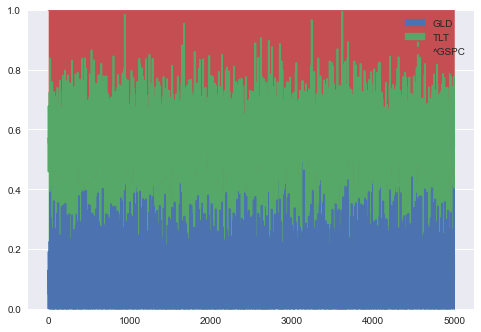

In [145]:
df.plot(kind='area', ylim=(0,1))

In [146]:
df.median()

GLD      0.104810
TLT      0.470098
^GSPC    0.415464
dtype: float64